<a href="https://colab.research.google.com/github/kpahwa16/CM226/blob/main/M226_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Downlaod the required data files from the link below** 

In [ ]:
!wget https://drive.google.com/drive/folders/1_VbrlER6wVKhqlDwv8w9BN6LYS6etQfk?usp=sharing




# **Using the popular  plink open source tool for large scale genome wide studies : https://zzz.bwh.harvard.edu/plink/**

In [3]:
!pip install pandas-plink
!pip install scikit-allel

     |████████████████████████████████| 100 kB 3.4 MB/s 
     |████████████████████████████████| 2.9 MB 43.8 MB/s 
     |████████████████████████████████| 280 kB 43.7 MB/s 
     |████████████████████████████████| 132 kB 63.5 MB/s 
  Attempting uninstall: pluggy
    Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Successfully uninstalled pluggy-0.7.1
  Attempting uninstall: pytest
    Found existing installation: pytest 3.6.4
    Uninstalling pytest-3.6.4:
      Successfully uninstalled pytest-3.6.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 5.7 MB 4.9 MB/s 


# **Import the required packages**

In [27]:
from tqdm import tqdm
import numpy as np
import allel
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from numpy import mean
from numpy import std

In [5]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


# **Using Plink Tool to proces the bim, fam, and bed files to generate the genotype matrix**

In [6]:
from pandas_plink import read_plink1_bin


In [7]:
G = read_plink1_bin("/content/gdrive/MyDrive/genopheno/Genotypes/sample.bed", "/content/gdrive/MyDrive/genopheno/Genotypes/sample.bim", "/content/gdrive/MyDrive/genopheno/Genotypes/sample.fam", verbose=False)

In [8]:
G

,Array,Chunk
Bytes,168.36 MB,2.06 MB
Shape,"(503, 83678)","(503, 1024)"
Count,328 Tasks,82 Chunks
Type,float32,numpy.ndarray


In [9]:
id=G.iid.values

In [10]:
id

array(['HG00096', 'HG00097', 'HG00099', 'HG00100', 'HG00101', 'HG00102',
       'HG00103', 'HG00105', 'HG00106', 'HG00107', 'HG00108', 'HG00109',
       'HG00110', 'HG00111', 'HG00112', 'HG00113', 'HG00114', 'HG00115',
       'HG00116', 'HG00117', 'HG00118', 'HG00119', 'HG00120', 'HG00121',
       'HG00122', 'HG00123', 'HG00125', 'HG00126', 'HG00127', 'HG00128',
       'HG00129', 'HG00130', 'HG00131', 'HG00132', 'HG00133', 'HG00136',
       'HG00137', 'HG00138', 'HG00139', 'HG00140', 'HG00141', 'HG00142',
       'HG00143', 'HG00145', 'HG00146', 'HG00148', 'HG00149', 'HG00150',
       'HG00151', 'HG00154', 'HG00155', 'HG00157', 'HG00158', 'HG00159',
       'HG00160', 'HG00171', 'HG00173', 'HG00174', 'HG00176', 'HG00177',
       'HG00178', 'HG00179', 'HG00180', 'HG00181', 'HG00182', 'HG00183',
       'HG00185', 'HG00186', 'HG00187', 'HG00188', 'HG00189', 'HG00190',
       'HG00231', 'HG00232', 'HG00233', 'HG00234', 'HG00235', 'HG00236',
       'HG00237', 'HG00238', 'HG00239', 'HG00240', 

In [11]:
snps=G.snp.variant.values

In [12]:
snps[0]

'variant0'

In [13]:
G.snp.variant.values

array(['variant0', 'variant1', 'variant2', ..., 'variant83675',
       'variant83676', 'variant83677'], dtype='<U12')

In [ ]:
geno_arr=[]
for idd in tqdm(id):
    geno_arr.append(G.sel(sample = idd,variant = snps).values)
 

100%|██████████| 503/503 [01:55<00:00,  4.35it/s]


In [ ]:
geno_ar=np.array(geno_arr)

In [ ]:
geno_ar.shape
# consists of 503 individuals and 83678 SNPs

(503, 83678)

In [ ]:
print(geno_ar)

[[2. 1. 2. ... 2. 1. 2.]
 [1. 2. 1. ... 2. 1. 2.]
 [1. 2. 1. ... 1. 2. 2.]
 ...
 [2. 2. 2. ... 1. 1. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 1. 2. ... 2. 1. 1.]]


# **Mount the Google Drive and save the generated genotype array**

In [ ]:
with open('/content/gdrive/MyDrive/genopheno/geno_arr.npy', 'wb') as f:
    np.save(f, geno_ar)

In [14]:
geno_ar=np.load('/content/gdrive/MyDrive/genopheno/geno_arr.npy')

# **Linkage Disequilibrium Pruning / Clumping**

In [15]:
def ld_prune(gn, size, step, threshold=.1, n_iter=1):
    # idx = []
    for i in range(n_iter):
        loc_unlinked = allel.locate_unlinked(gn, size=size, step=step, threshold=threshold)
        # idx = np.where(loc_unlinked)[0]
        n = np.count_nonzero(loc_unlinked)
        n_remove = gn.shape[0] - n
        print('iteration', i+1, 'retaining', n, 'removing', n_remove, 'variants')
        gn = gn.compress(loc_unlinked, axis=0)
    return np.transpose(gn)

In [16]:
geno_ar_pruned = ld_prune(np.transpose(geno_ar),size=5,step = 1,threshold=.1, n_iter=3)
geno_ar_pruned.shape

iteration 1 retaining 28610 removing 55068 variants
iteration 2 retaining 14294 removing 14316 variants
iteration 3 retaining 8995 removing 5299 variants


(503, 8995)

In [ ]:
def plot_ld(gn, title):
    m = allel.rogers_huff_r(gn) ** 2
    ax = allel.plot_pairwise_ld(m)
    ax.set_title(title)

In [ ]:
plot_ld(np.transpose(geno_ar)[:1000], 'Figure 1. Pairwise LD.') # before pruning
plot_ld(np.transpose(geno_ar_pruned)[:1000], 'Figure 1. Pairwise LD.') # after pruning

# **Applying Logistic Regression for Classification of case / control from the genpotype data and simulated phenotype data for hsq values of 0.2, 0.4 and 0.8 applying One Percent Causal and Infinite Causal Models** 

Accuracy: 0.553 (0.061)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.541 (0.058)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.598 (0.063)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


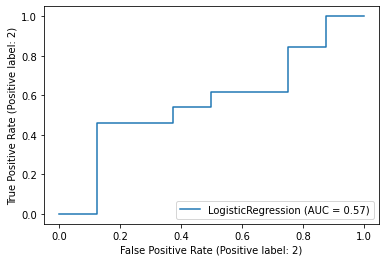

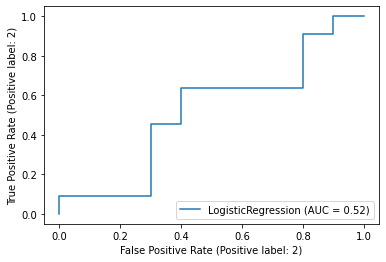

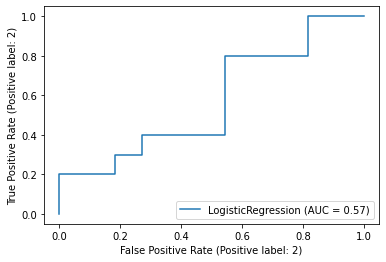

In [22]:
hsq=[2,4,8]
LR_test_score=[]
LR_train_score=[]
cross_val_scores = []
for hs in hsq: 
  data = pd.read_csv('/content/gdrive/MyDrive/genopheno/Phenotypes/OnePercCaseCont/Sim.OnePercCausal.0.'+str(hs)+'.hsq.0.5.prev.CaseControl.1.phen', delimiter=' ', header=None, index_col=None )
  data=data.drop(columns=[0, 1,3])

  y=data[2].values
  rem=np.where(y==-9)

  X=np.delete(geno_ar_pruned, rem[0],axis=0)
  y=np.delete(y, rem[0],axis=0)
  X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(X), y, test_size=0.04, random_state=42)

  reg = LogisticRegression(max_iter=100000).fit(X_train, y_train)
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(reg, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  cross_val_scores.append(scores)
  print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
  LR_train_score.append(reg.score(X_train, y_train))
  LR_test_score.append(reg.score(X_test, y_test))
  metrics.plot_roc_curve(reg, X_test, y_test) 
plt.show()

In [24]:
LR_test_score, cross_val_scores

([0.5714285714285714, 0.5714285714285714, 0.5238095238095238],
 [array([0.52941176, 0.49019608, 0.44      , 0.56      , 0.6       ,
         0.56      , 0.62      , 0.58      , 0.6       , 0.52      ,
         0.52941176, 0.56862745, 0.66      , 0.5       , 0.48      ,
         0.42      , 0.54      , 0.48      , 0.64      , 0.6       ,
         0.50980392, 0.56862745, 0.52      , 0.58      , 0.5       ,
         0.58      , 0.58      , 0.62      , 0.54      , 0.68      ]),
  array([0.58823529, 0.47058824, 0.6       , 0.5       , 0.56      ,
         0.54      , 0.66      , 0.58      , 0.56      , 0.56      ,
         0.52941176, 0.60784314, 0.58      , 0.48      , 0.54      ,
         0.46      , 0.54      , 0.58      , 0.52      , 0.46      ,
         0.47058824, 0.47058824, 0.48      , 0.52      , 0.64      ,
         0.62      , 0.6       , 0.46      , 0.58      , 0.46      ]),
  array([0.54901961, 0.64705882, 0.5       , 0.72      , 0.6       ,
         0.54      , 0.64      , 0.6

# **Applying Random Forest  for Classification of case / control from the genpotype data and simulated phenotype data for hsq values of 0.2, 0.4 and 0.8 applying One Percent Causal and Infinite Causal Models** 

# Applying Randomized Search CV to prepare the exploration grid space

In [25]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

# **Random Search Tuning**

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
hsq=[2,4,8]
RF_test_score=[]
RF_train_score=[]

for hs in hsq: 
  data = pd.read_csv('/content/gdrive/MyDrive/genopheno/Phenotypes/OnePercCaseCont/Sim.OnePercCausal.0.'+str(hs)+'.hsq.0.5.prev.CaseControl.1.phen', delimiter=' ', header=None, index_col=None )
  data=data.drop(columns=[0, 1,3])

  y=data[2].values
  rem=np.where(y==-9)

  X=np.delete(geno_ar_pruned, rem[0],axis=0)
  y=np.delete(y, rem[0],axis=0)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

  clf = RandomForestClassifier(n_estimators=2000,random_state=2)
  clf.fit(X_train, y_train)
  RF_train_score.append(clf.score(X_train, y_train))
  RF_test_score.append(clf.score(X_test, y_test))
  metrics.plot_roc_curve(clf, X_test, y_test)

plt.show()

In [ ]:
RF_test_scores


# **XGBoost**

In [36]:
from xgboost import cv
import xgboost as xgb

params = {'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

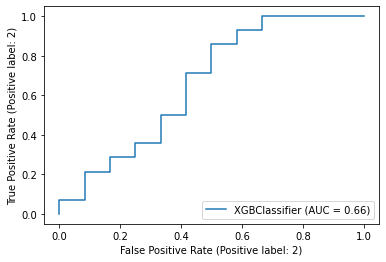

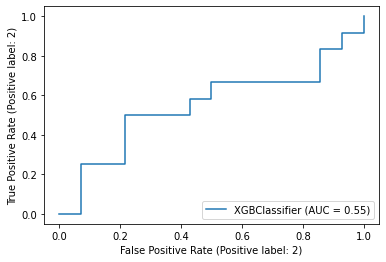

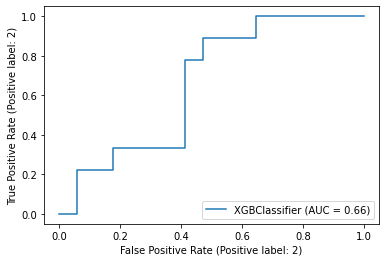

In [39]:
hsq=[2,4,8]
XG_test_score=[]
XG_train_score=[]

for hs in hsq: 
  data = pd.read_csv('/content/gdrive/MyDrive/genopheno/Phenotypes/OnePercCaseCont/Sim.OnePercCausal.0.'+str(hs)+'.hsq.0.5.prev.CaseControl.1.phen', delimiter=' ', header=None, index_col=None )
  data=data.drop(columns=[0, 1,3])

  y=data[2].values
  rem=np.where(y==-9)

  data_dmatrix = xgb.DMatrix(data=X_train,label=y) 
  X=np.delete(geno_ar, rem[0],axis=0)
  y=np.delete(y, rem[0],axis=0)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=1)
  dtrain = [X_train, y_train]
  xgb_cv = cv(dtrain = data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, as_pandas=True, seed=123)

  clf = xgb.XGBClassifier()

  clf.fit(X_train, y_train)

  XG_train_score.append(clf.score(X_train, y_train))
  XG_test_score.append(clf.score(X_test, y_test))
  metrics.plot_roc_curve(clf, X_test, y_test)

plt.show()